# image classification

We will use the CIFAR10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
from tensorflow import keras

In [ ]:
keras.__version__

'2.6.0'

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images.dtype

dtype('uint8')

In [ ]:
n_images = 5000

train_images = train_images[:n_images]
train_labels = train_labels[:n_images]

In [ ]:
train_images.shape

(5000, 32, 32, 3)

In [ ]:
train_images.min(), train_images.max()

(0, 255)

In [ ]:
train_labels.shape

(5000, 1)

In [ ]:
train_labels.min(), train_labels.max()

(0, 9)

In [ ]:
train_labels.dtype

dtype('uint8')

In [ ]:
train_images = train_images / 255.
test_images = test_images / 255.

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


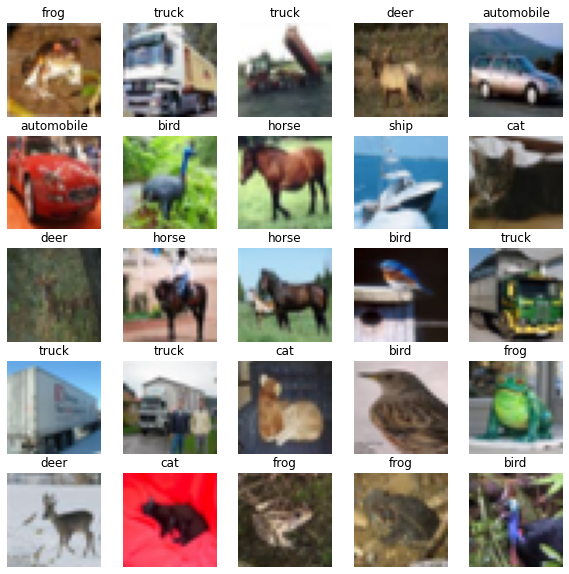

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.axis('off')
  plt.title(class_names[train_labels[i,0]])
plt.show()

In [ ]:
image_dim = train_images.shape[1]*train_images.shape[2]*train_images.shape[3]
print(image_dim)

3072


![](https://carpentries-incubator.github.io/deep-learning-intro/fig/04_conv_matrix.png)

![](https://carpentries-incubator.github.io/deep-learning-intro/fig/04_conv_image.png)

In [ ]:
def create_cnn1():

  inputs = keras.Input(shape=train_images.shape[1:])

  conv1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
  conv2 = keras.layers.Conv2D(32, (3,3), activation='relu')(conv1)
  flat = keras.layers.Flatten()(conv2)

  outputs = keras.layers.Dense(10)(flat)

  return keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model = create_cnn1()
model.summary()

Model: "cifar_model_small"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250890    
Total params: 261,034
Trainable params: 261,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_cnn2():

  inputs = keras.Input(shape=train_images.shape[1:])

  conv1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
  pool1 = keras.layers.MaxPool2D((2,2))(conv1)
  conv2 = keras.layers.Conv2D(32, (3,3), activation='relu')(pool1)
  pool2 = keras.layers.MaxPool2D((2,2))(conv2)
  flat = keras.layers.Flatten()(pool2)

  outputs = keras.layers.Dense(10)(flat)

  return keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model = create_cnn2()
model.summary()

Model: "cifar_model_small"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)          

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 [==============================] - 9s 53ms/step - loss: 2.0251 - accuracy: 0.2640 - val_loss: 1.8137 - val_accuracy: 0.3435
Epoch 2/10
157/157 [==============================] - 8s 51ms/step - loss: 1.7044 - accuracy: 0.3928 - val_loss: 1.6443 - val_accuracy: 0.4165
Epoch 3/10
157/157 [==============================] - 8s 51ms/step - loss: 1.5849 - accuracy: 0.4384 - val_loss: 1.5675 - val_accuracy: 0.4325
Epoch 4/10
157/157 [==============================] - 8s 52ms/step - loss: 1.4899 - accuracy: 0.4706 - val_loss: 1.5147 - val_accuracy: 0.4554
Epoch 5/10
157/157 [==============================] - 8s 52ms/step - loss: 1.3825 - accuracy: 0.5132 - val_loss: 1.5123 - val_accuracy: 0.4635
Epoch 6/10
157/157 [==============================] - 8s 52ms/step - loss: 1.3188 - accuracy: 0.5328 - val_loss: 1.4188 - val_accuracy: 0.4937
Epoch 7/10
157/157 [==============================] - 8s 52ms/step - loss: 1.2738 - accuracy: 0.5582 - val_loss: 1.4239 - val_accuracy: 0.4947

In [ ]:
import seaborn as sns
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
print(history_df.columns)

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')


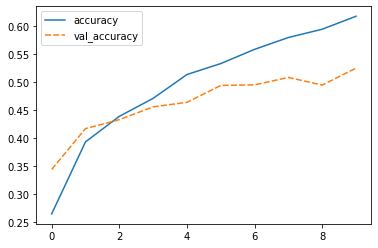

In [ ]:
sns.lineplot(data=history_df[['accuracy','val_accuracy']])

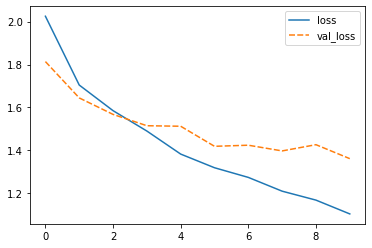

In [ ]:
sns.lineplot(data=history_df[['loss','val_loss']])

![](https://carpentries-incubator.github.io/deep-learning-intro/fig/neural_network_sketch_dropout.png)

In [ ]:
def create_cnn3():

  inputs = keras.Input(shape=train_images.shape[1:])

  conv1 = keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
  pool1 = keras.layers.MaxPool2D((2,2))(conv1)
  conv2 = keras.layers.Conv2D(32, (3,3), activation='relu')(pool1)
  pool2 = keras.layers.MaxPool2D((2,2))(conv2)
  dropped = keras.layers.Dropout(0.2)(pool2)

  flat = keras.layers.Flatten()(dropped)

  outputs = keras.layers.Dense(10)(flat)

  return keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small_withdropout")

model = create_cnn3()
model.summary()




Model: "cifar_model_small_withdropout"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 [==============================] - 9s 53ms/step - loss: 2.1068 - accuracy: 0.2230 - val_loss: 1.8696 - val_accuracy: 0.3293
Epoch 2/10
157/157 [==============================] - 8s 49ms/step - loss: 1.7759 - accuracy: 0.3640 - val_loss: 1.7082 - val_accuracy: 0.3797
Epoch 3/10
157/157 [==============================] - 8s 49ms/step - loss: 1.6277 - accuracy: 0.4138 - val_loss: 1.6034 - val_accuracy: 0.4204
Epoch 4/10
157/157 [==============================] - 8s 49ms/step - loss: 1.5188 - accuracy: 0.4552 - val_loss: 1.5233 - val_accuracy: 0.4451
Epoch 5/10
157/157 [==============================] - 8s 49ms/step - loss: 1.4502 - accuracy: 0.4800 - val_loss: 1.4981 - val_accuracy: 0.4547
Epoch 6/10
157/157 [==============================] - 8s 49ms/step - loss: 1.3817 - accuracy: 0.5124 - val_loss: 1.4586 - val_accuracy: 0.4787
Epoch 7/10
157/157 [==============================] - 8s 50ms/step - loss: 1.3358 - accuracy: 0.5226 - val_loss: 1.4074 - val_accuracy: 0.4987

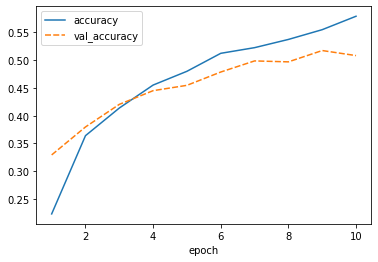

In [ ]:
history_df = pd.DataFrame.from_dict(history.history)
history_df['epoch'] = range(1,len(history_df)+1)
history_df = history_df.set_index('epoch')
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 1.3884 - accuracy: 0.5083


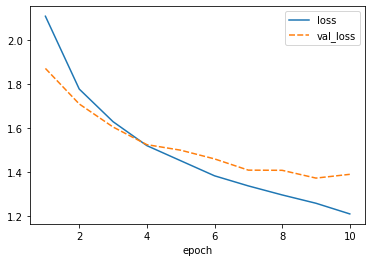

In [ ]:
sns.lineplot(data=history_df[['loss', 'val_loss']])